In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def calculate_investment_growth(P, r, months, max_trades):
    """Calculate investment growth for different numbers of trades."""
    investment_curves = {}
    
    for n_trades in range(1, max_trades + 1):
        investment_values = [P]
        
        for m in range(1, months + 1):
            monthly_profit = investment_values[-1] * (r * n_trades)  # Monthly profit
            new_value = investment_values[-1] + monthly_profit  # New investment value
            investment_values.append(round(new_value))
        
        investment_curves[n_trades] = investment_values

    return investment_curves

def plot_investment_growth (investment_curves, r, months):
    """Plot the investment growth curves with synchronized axes."""
    month_range = np.arange(0, months + 1)
    
    # Create the figure and the left axis
    fig, ax_left = plt.subplots(figsize=(10, 6), dpi=300)
    
    # Plotting the investment growth curves on the left axis
    for n_trades, values in investment_curves.items():
        ax_left.plot(month_range, values, marker='o', markersize= 3, alpha=0.5, label=f'{n_trades} Wins/Month')
    
    # Calculate consistent y-axis limits across both axes
    y_min, y_max = min(min(values) for values in investment_curves.values()), max(max(values) for values in investment_curves.values())
    y_padding = 0.1 * (y_max - y_min)
    y_min, y_max = y_min - y_padding, y_max + y_padding
    ax_left.set_ylim(y_min, y_max)

    # Ensure ticks are identical
    y_ticks = ax_left.get_yticks()

    # Apply consistent formatting for both axes
    currency_formatter = plt.FuncFormatter(lambda x, _: f'${int(x):,}')
    ax_left.yaxis.set_major_formatter(currency_formatter)

    # Add annotation text
    ax_left.text(0.5, 0.5, f'@{round(r*100, 2)}% Profit', transform=ax_left.transAxes, 
                 fontsize=50, color='grey', alpha=0.2,
                 horizontalalignment='center', verticalalignment='center',
                 rotation=0, weight='bold', style='italic')

    # Customizing the plot
    ax_left.yaxis.tick_right()
    ax_left.set_title(f'Investment Growth @{round(r*100, 2)}% Profit')
    ax_left.set_xlabel('Months')
    ax_left.set_ylabel('Investment Value ($)')
    ax_left.set_xticks(month_range)
    ax_left.grid(alpha = 0.25)
    ax_left.legend(title='Successful Trades')
    plt.tight_layout()
    plt.show()
    
def plot_investment_growth2(investment_curves, x, r, months):
    """Plot the investment growth curves."""
    month_range = np.arange(0, months + 1)
    
    # Create the figure and the left axis
    fig, ax_left = plt.subplots(figsize=(10, 6), dpi=300)
    
    # Plotting the investment growth curves on the left axis
    for n_trades, values in investment_curves.items():
        ax_left.plot(month_range, values, marker='o', markersize= 3, alpha=0.5, label=f'{n_trades} Trades/Month')
    
    ax_left.plot(month_range, x, color='black', linewidth = 3, alpha=0.3, linestyle='--',  label=f'Actual Profits')
    ax_left.text(0.5, 0.5, f'@{round(r*100, 2)}% Profit', transform=ax_left.transAxes, 
                fontsize=50, color='grey', alpha=0.2,  # Adjust transparency here
                horizontalalignment='center', verticalalignment='center',
                rotation=0, weight='bold', style='italic')

    # Customising the plot
    ax_left.yaxis.tick_right()
    ax_left.set_title(f'Investment Growth @{round(r*100, 2)}% Profit')
    ax_left.set_xlabel('Months')
    ax_left.set_ylabel('Investment Value ($)')
    #ax_right.set_ylabel('Investment Value ($)')  # Y-axis label for the right side
    ax_left.set_xticks(month_range)
    ax_left.grid(alpha = 0.25)
    ax_left.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x):,}'))  # Format left y-axis as currency
    ax_left.legend(title='Successful Trades')
    plt.tight_layout()
    plt.show()

def create_investment_dataframe(investment_curves, months):
    """Create a dataframe from investment curves."""
    month_range = np.arange(0, months + 1)
    df_investments = pd.DataFrame(investment_curves, index=month_range)
    df_investments.index.name = 'Month'
    
    return df_investments


Total Profit: $61260


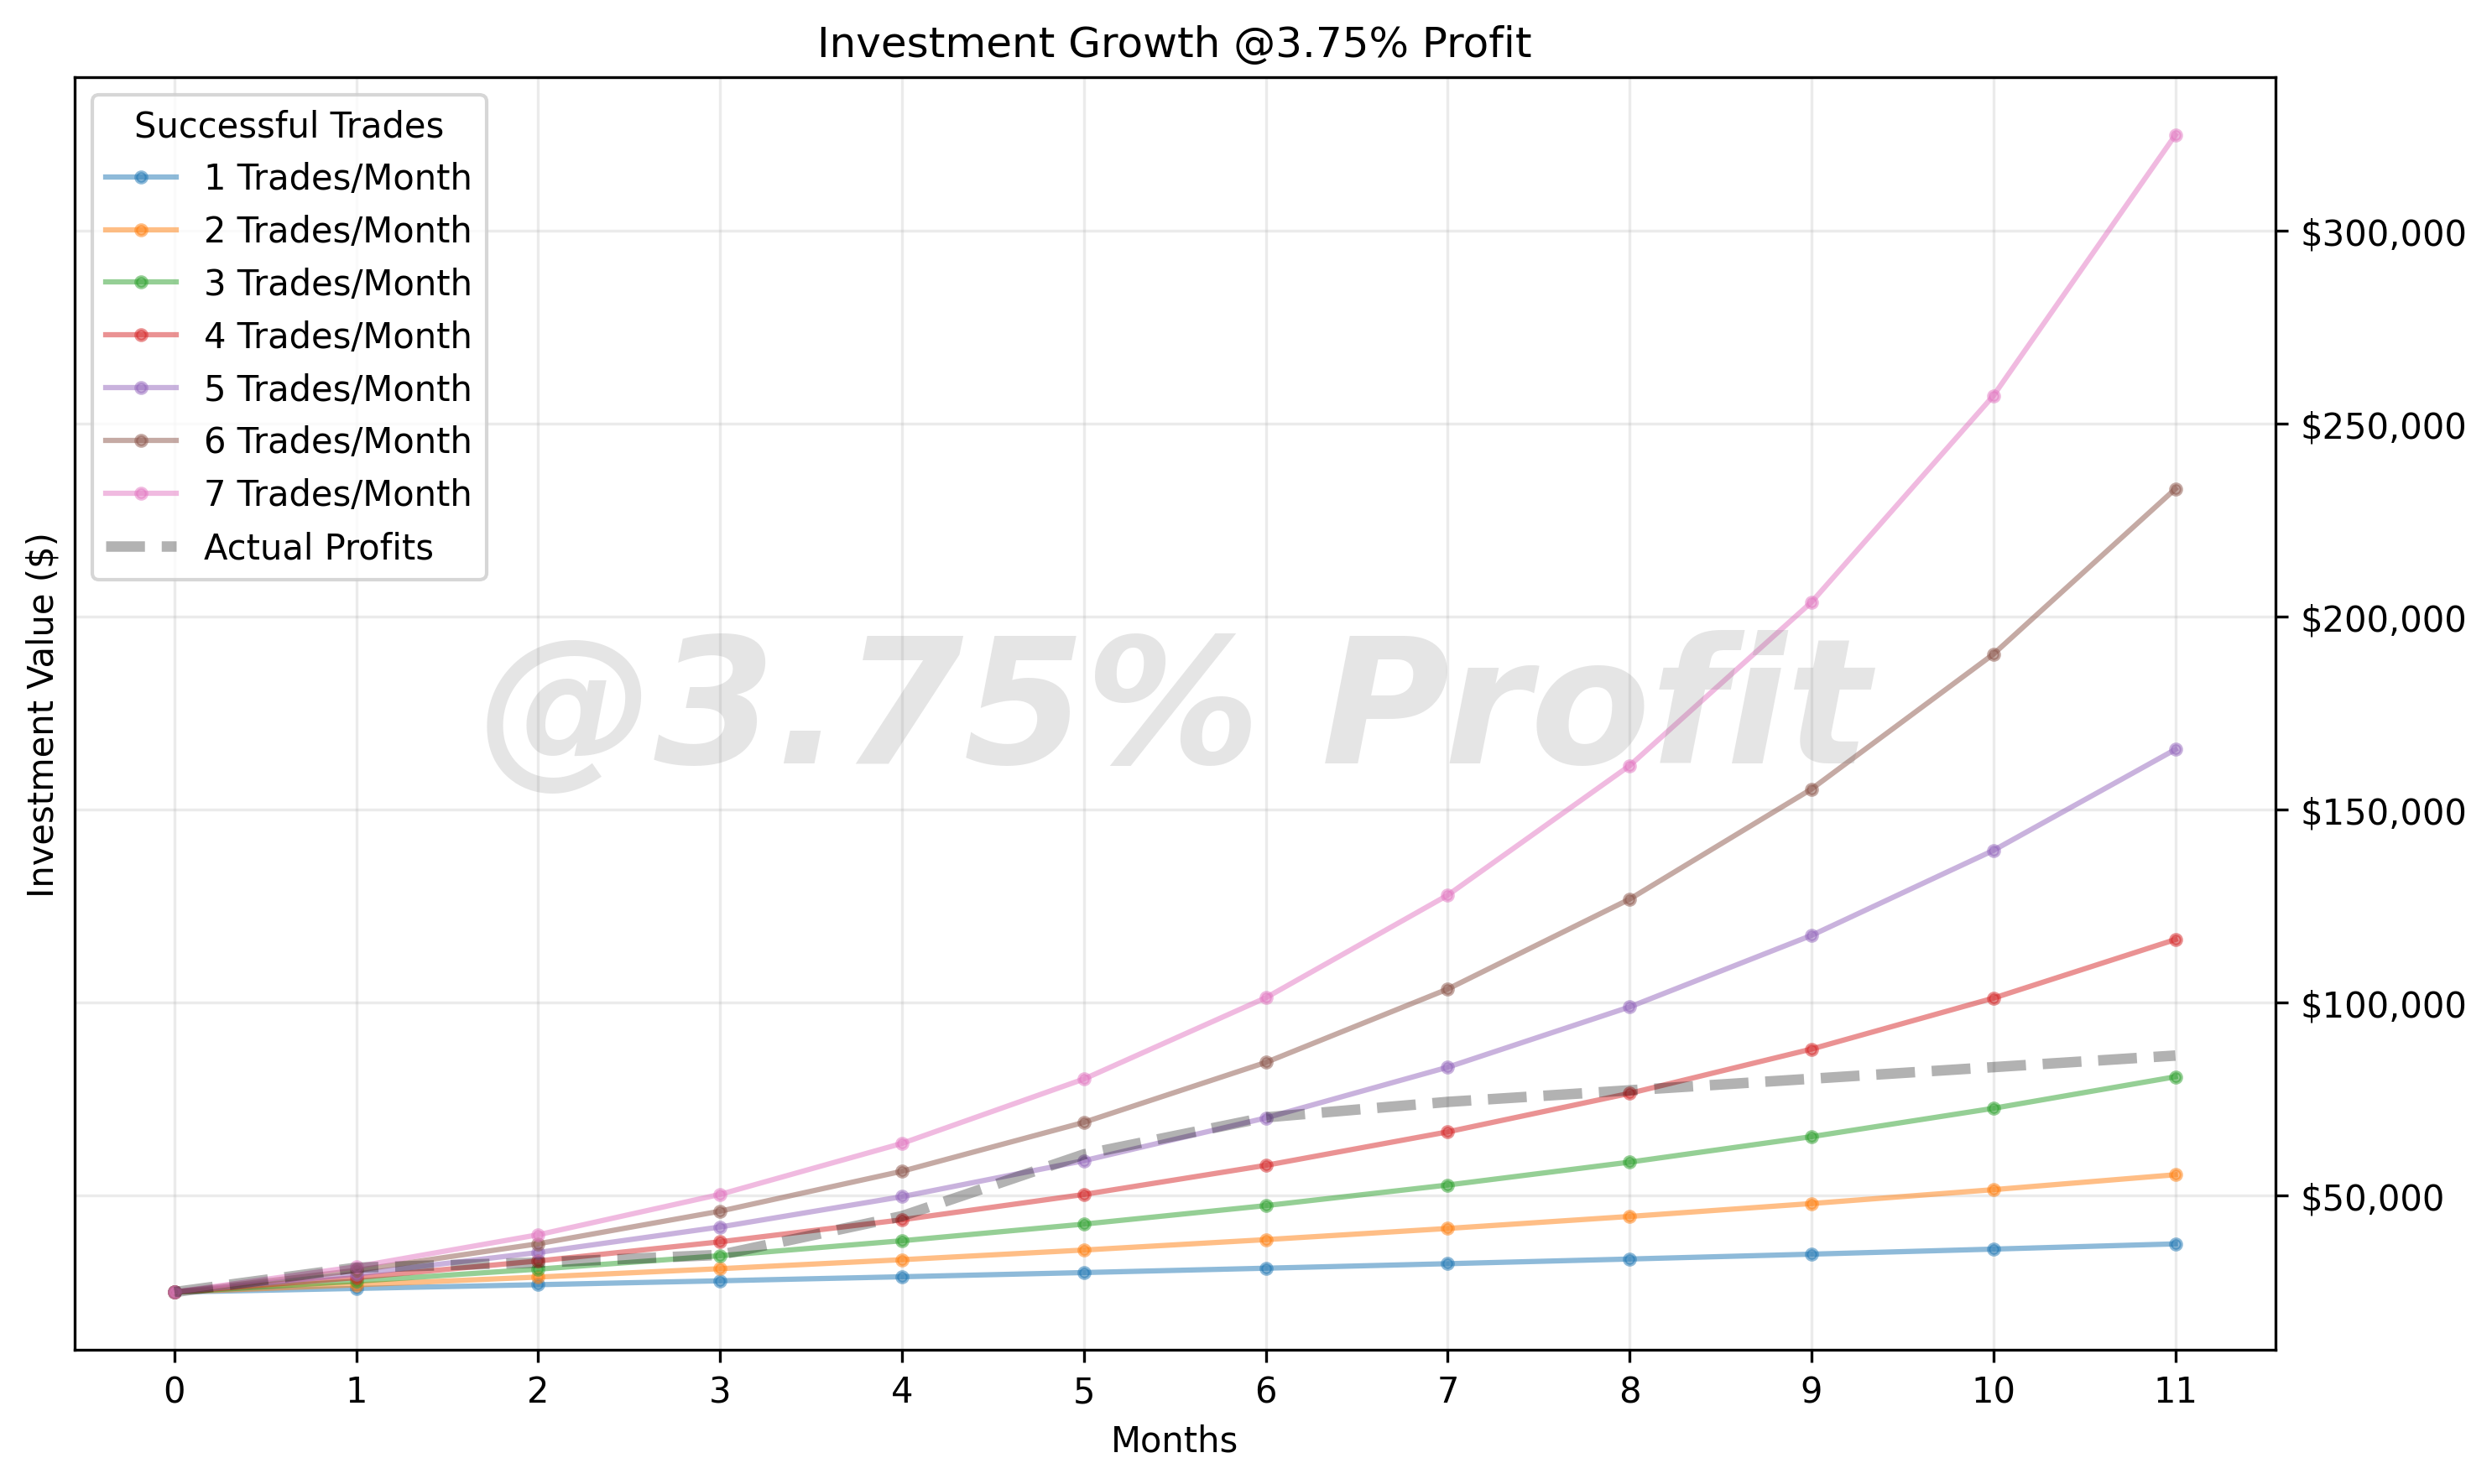

           1      2      3       4       5       6       7
Month                                                     
0      25000  25000  25000   25000   25000   25000   25000
1      25938  26875  27812   28750   29688   30625   31562
2      26911  28891  30941   33062   35254   37516   39847
3      27920  31058  34422   38021   41864   45957   50307
4      28967  33387  38294   43724   49714   56297   63513
5      30053  35891  42602   50283   59035   68964   80185
6      31180  38583  47395   57825   70104   84481  101234
7      32349  41477  52727   66499   83248  103489  127808
8      33562  44588  58659   76474   98857  126774  161358
9      34821  47932  65258   87945  117393  155298  203714
10     36127  51527  72600  101137  139404  190240  257189
11     37482  55392  80768  116308  165542  233044  324701


In [3]:
# Main function to run the investment growth analysis
# Investment parameters
P = 25000 # Initial investment ($)
r = 0.0375 # Monthly profit rate (2%)
months = 11 # Investment duration (months)
max_trades = 7 # Maximum number of trades

actual = [0, 6328, 1302, 2000, 10040, 16000, 
          9590, 4000, 3000, 3000, 3000, 3000]
print(f'Total Profit: ${np.sum(actual)}')

y = P + np.cumsum(actual)

investment_curves = calculate_investment_growth(P, r, months, max_trades)

#plot_investment_growth(investment_curves, r, months)
plot_investment_growth2(investment_curves, y, r, months)
df_investments = create_investment_dataframe(investment_curves, months)
print(df_investments)


##### WINNING TRADES & COMPOUNDING GOALS

Initial Capital: $ 140000
Net Profit: $ 279547 .... 299.68 %
Total Fees: $ 3864
---------


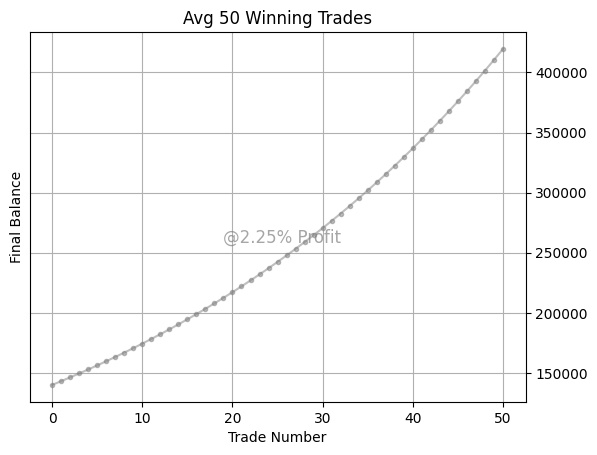

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

initial_capital = 140000
num_trades = 50
r = 2.25  # Fixed Profit
fee_percent = 0.03 # Trading fee of 1%

# Calculate the balance after each trade, factoring in the fee
balance = [initial_capital]
fees = [0]
for _ in range(num_trades):
    profit = balance[-1] * r / 100
    new_balance = balance[-1] + profit
    fee = new_balance * fee_percent / 100
    nb = round(new_balance - fee)
    fees.append(fee)
    balance.append(nb)

# Create a time series for the x-axis
time_series = np.arange(num_trades + 1)

fig, ax = plt.subplots()

# Plot the balance over time
plt.plot(time_series, balance, marker='o', markersize=3, color='grey', alpha=0.5)

# Adjust text position to fit within the plot
text_x = len(time_series) / 2  # Center horizontally
text_y = np.mean(balance)

ax.text(text_x, text_y, f'@{round(r, 2)}% Profit', 
         fontsize=12, color='grey', alpha=0.7, 
         horizontalalignment='center', verticalalignment='bottom')

ax.yaxis.tick_right()
ax.set_xlabel("Trade Number")
ax.set_ylabel("Final Balance")
ax.set_title(f"Avg {num_trades} Winning Trades")

ax.grid(True)

# Calculate the net profit and gain percentage
np = round(balance[-1] - initial_capital)
gain = round(balance[-1]*100/initial_capital, 2)

print("Initial Capital: $", initial_capital)
print("Net Profit: $", np, "....", gain, "%")
print('Total Fees: $', round(sum(fees)))
print ("---------")
data = pd.DataFrame({'Trades': time_series, 
                     'Balance': balance,
                    'Fees': fees})
data.index.name = 'Trades'
#print(data)